Assignment 2 – PS 9<br><br>
<b>Group 037<br>
<b>Aditi Gupta            2021FC04386
<p><b>Deepak Kumar G      2021FC04505
<p><b>Rahul Basu          2021FC04195

<h3> 1. Import Libraries/Dataset

<b>Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from scipy.stats import zscore
from sklearn.decomposition import PCA
%matplotlib inline

<b>Download the dataset

In [2]:
heart1=pd.read_csv('heart .csv')
heart=heart1.copy()

<h3>2. Data Visualization and Exploration

<b>Print 2 rows for sanity check

In [3]:
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [4]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<b>Comment on class imbalance with appropriate visualization method.

In [5]:
heart_disease_class = pd.DataFrame()
heart_disease_class['target'] = heart['target'].value_counts()
heart_disease_class['Percentage'] = heart['target']/(heart['target'].value_counts()).sum()*100
heart_disease_class

,target,Percentage
1,526,0.0
0,499,0.0


<AxesSubplot:xlabel='target', ylabel='count'>

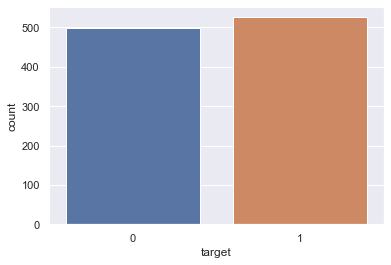

In [6]:
sns.countplot(x='target', data=heart)

<b>CONCLUSION : THOUGH THERE IS A CLASS IMBALANCE, IT IS INSIGNIFICANT CONSIDERING CONSIDERING THE SIZE OF DATASET

<b>Provide appropriate data visualizations to get an insight about the dataset.

In [7]:
#heart.dropna(inplace=True)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<b>TO FIND HOW DATA IS DISTRIBUTED ON EACH ATTRIBUTE, UNI VARIABLE DISTRIBUTION IS USED AS FOLLOWS

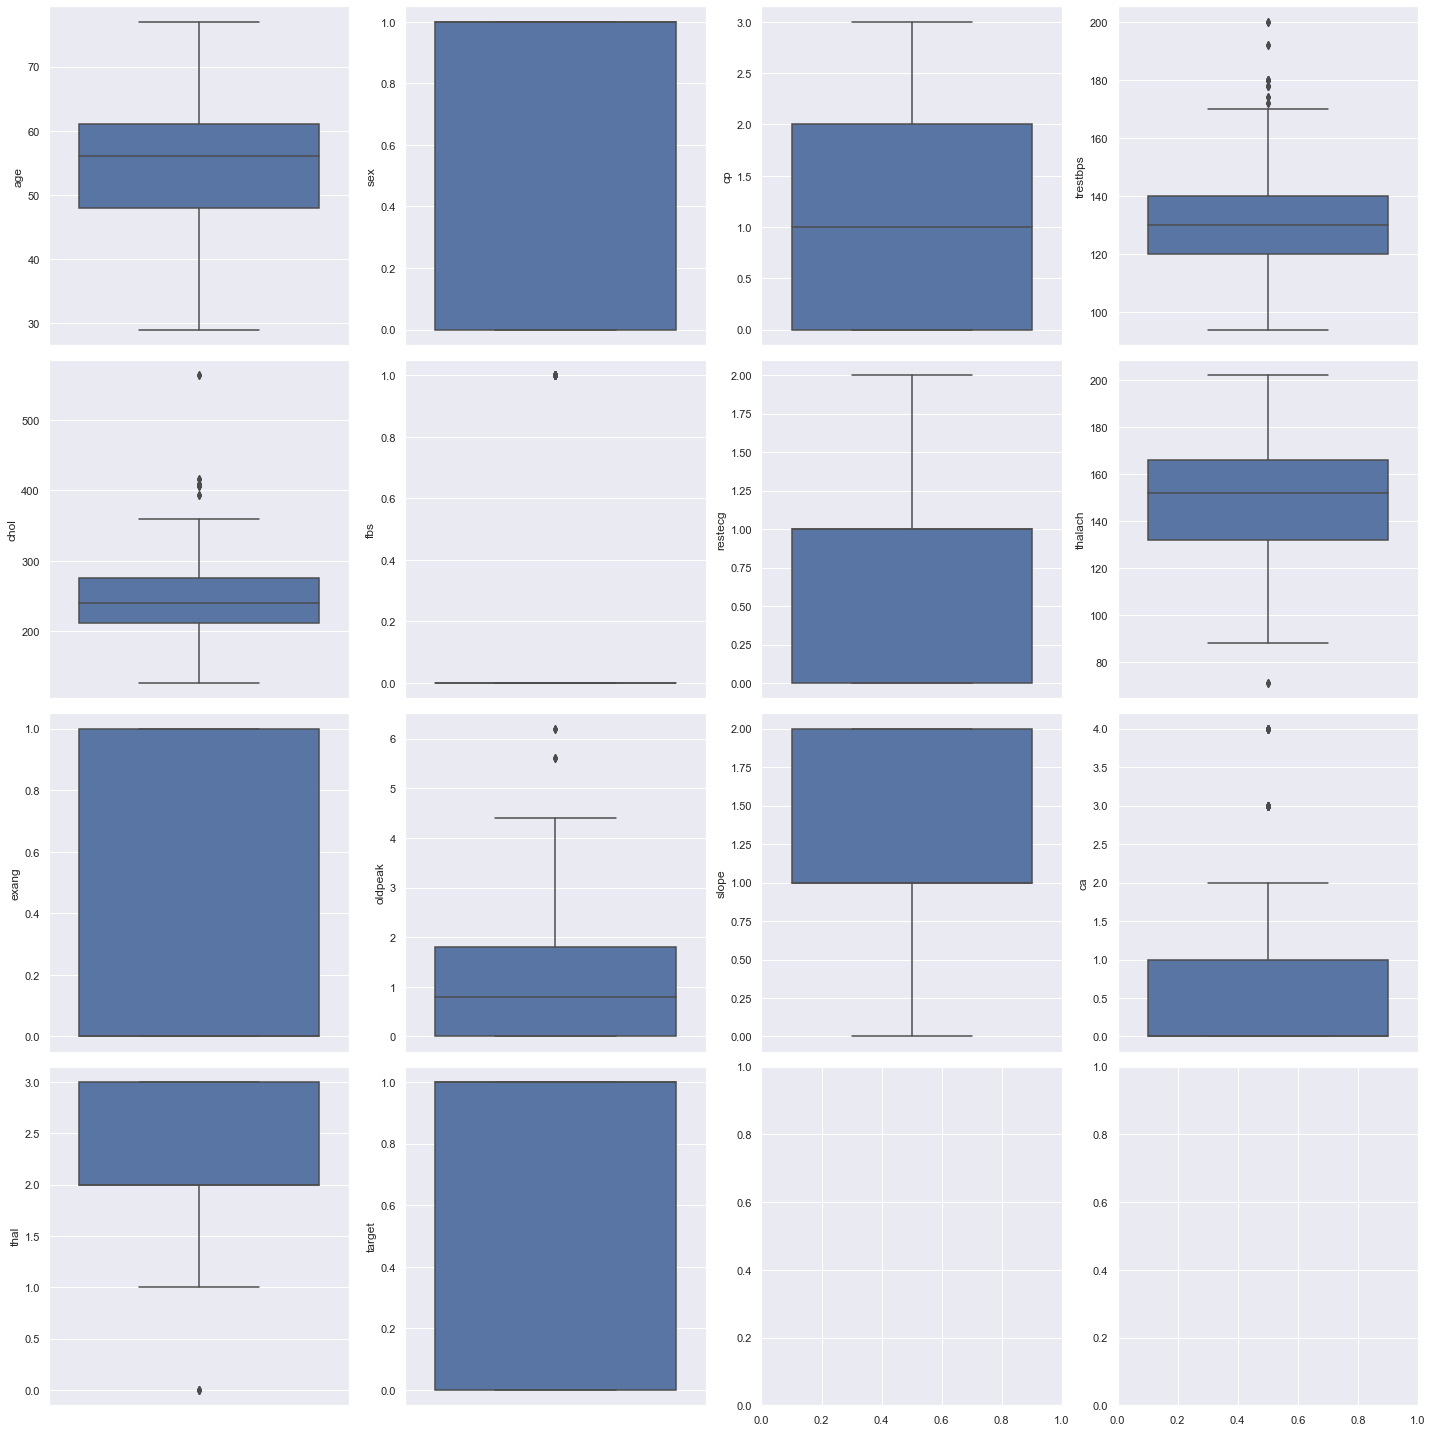

In [9]:
names = heart.columns
fig,axes = plt.subplots(4,4, figsize=(20,20))
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=heart, ax=ax)
plt.tight_layout()

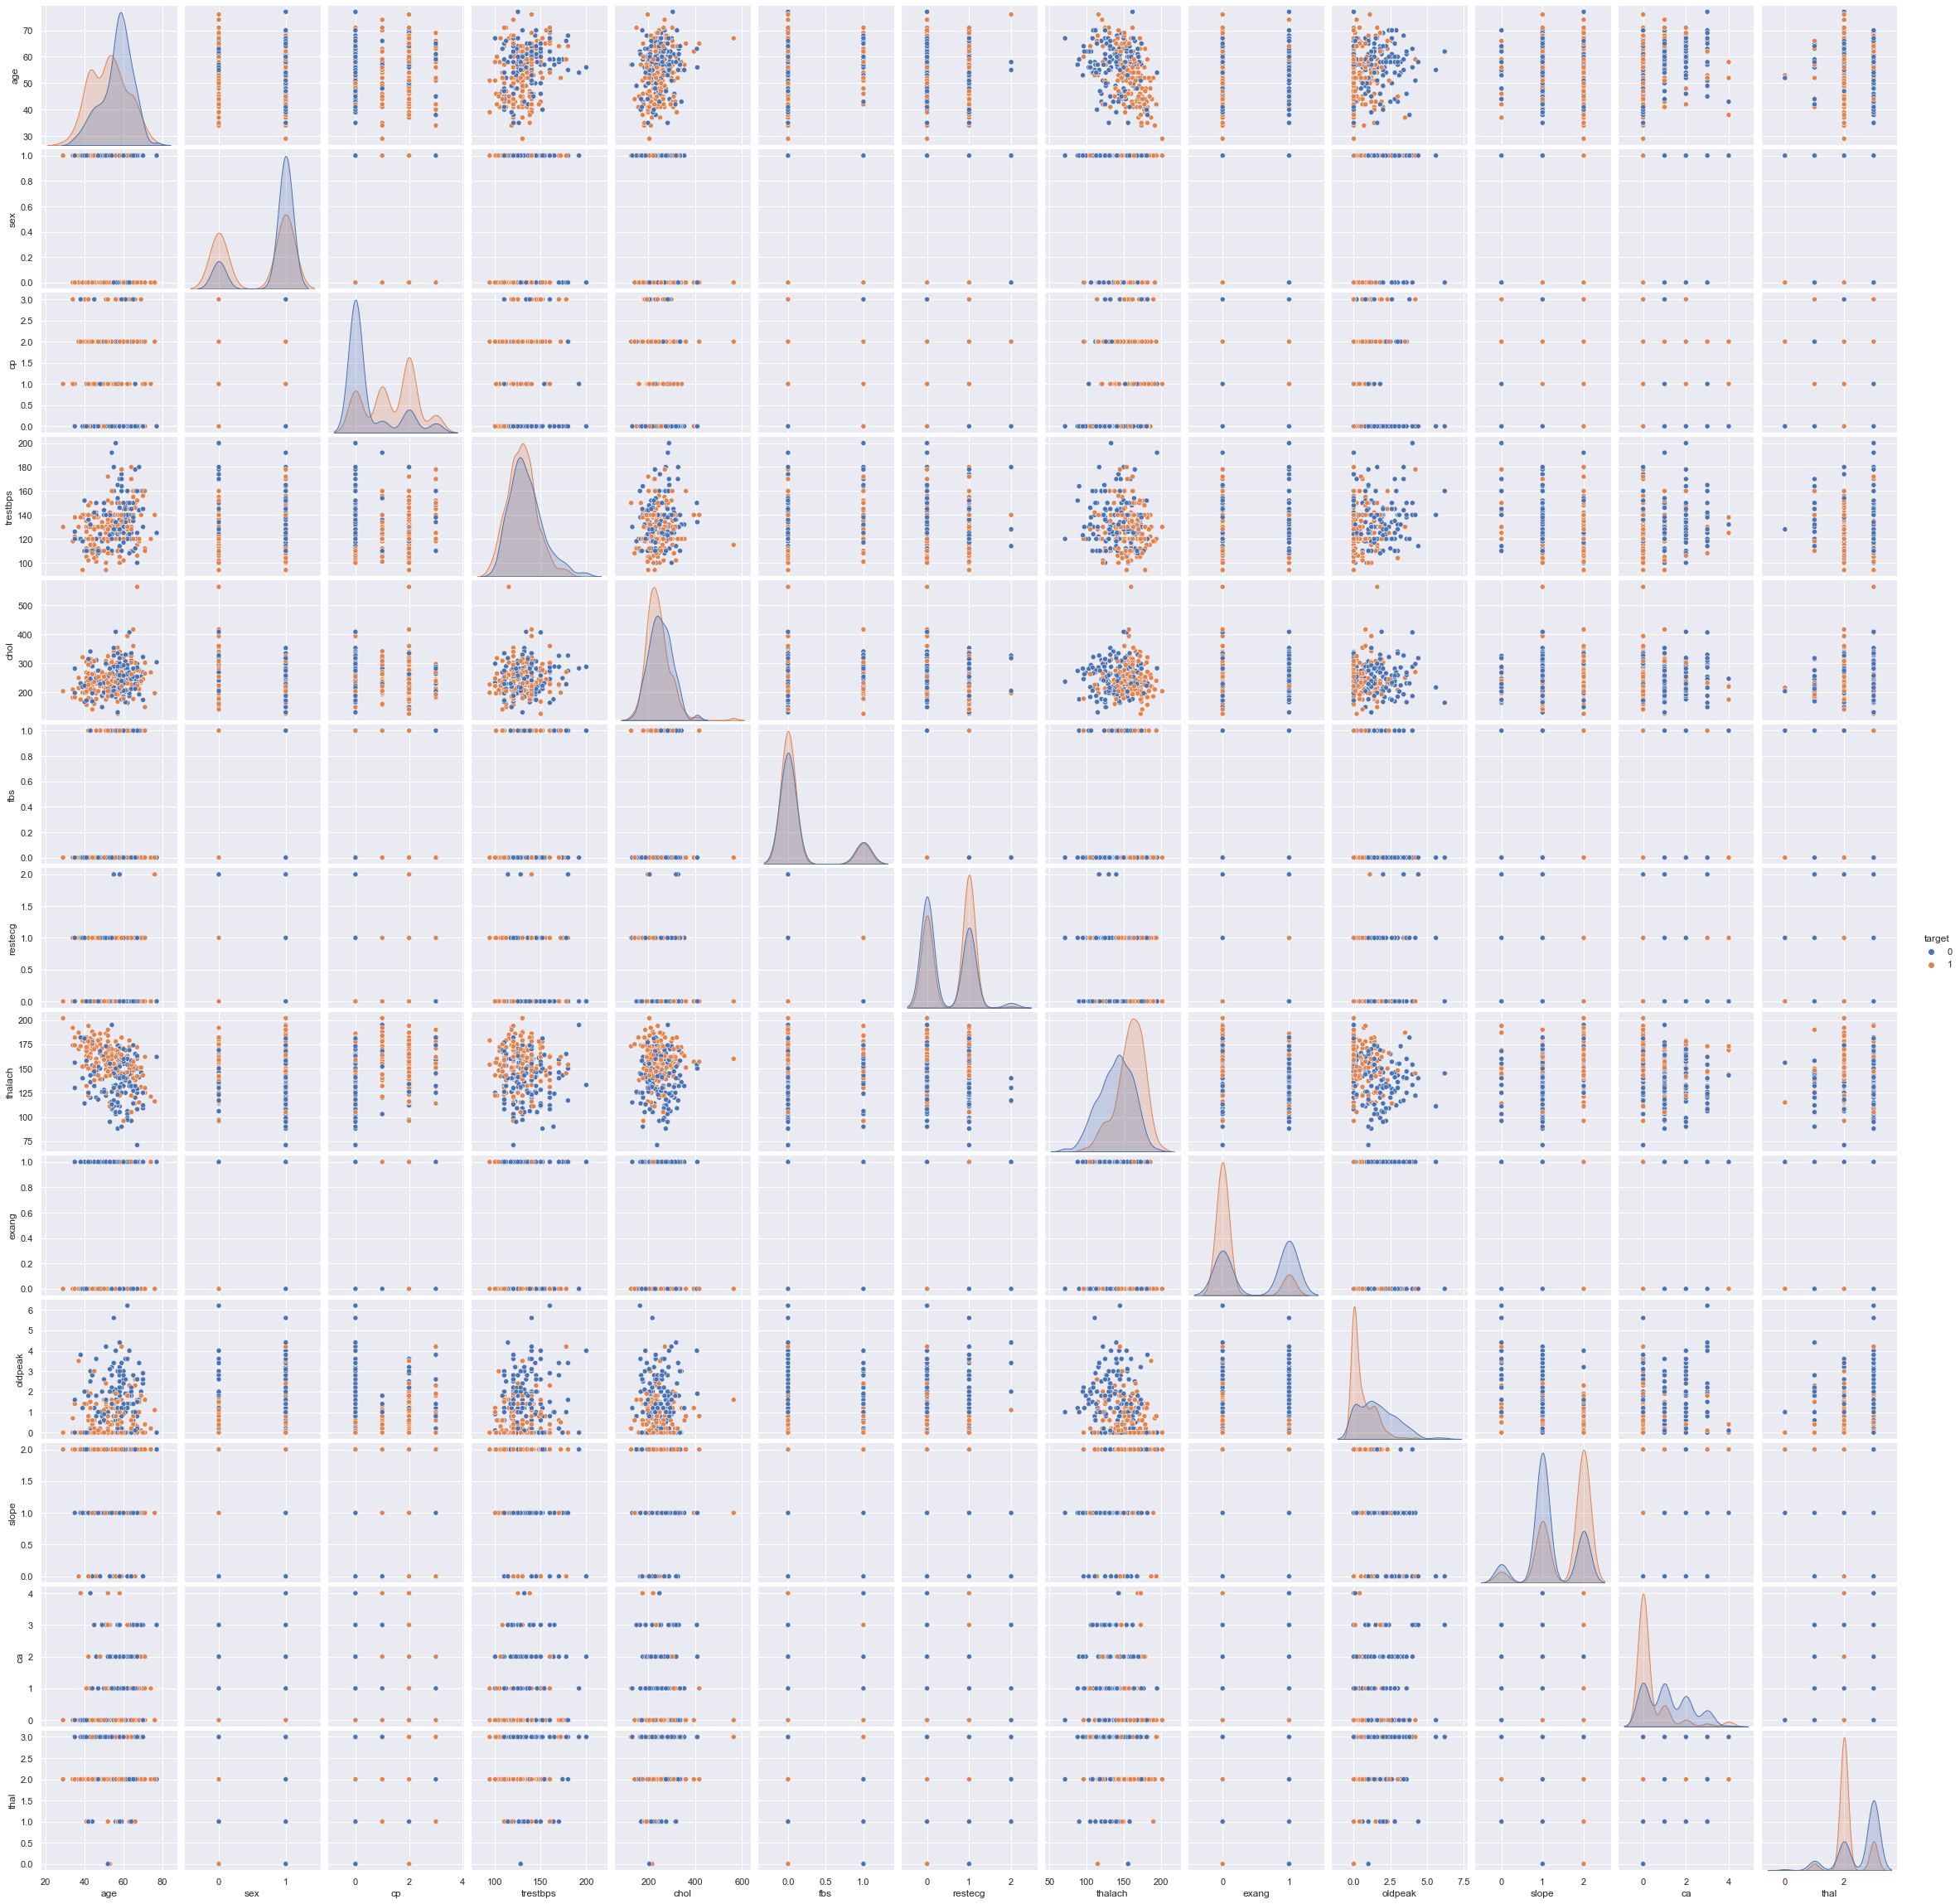

In [10]:
sns.pairplot(heart, diag_kind = "kde", hue = "target")

<br><b>BI VARIABLE ANALYSIS OF ATTRIBUTES

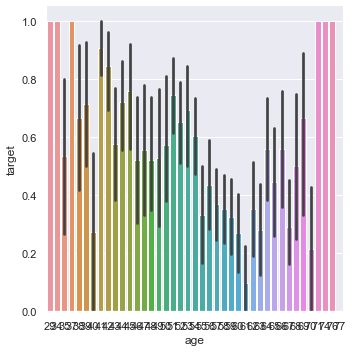

In [11]:
sns.catplot(x='age',y='target',data=heart,kind='bar')

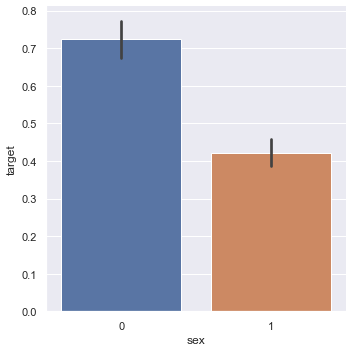

In [12]:
sns.catplot(x='sex',y='target',data=heart,kind='bar')

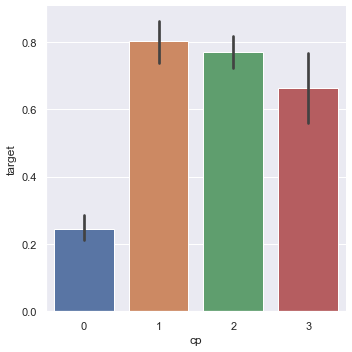

In [13]:
sns.catplot(x='cp',y='target',data=heart,kind='bar')

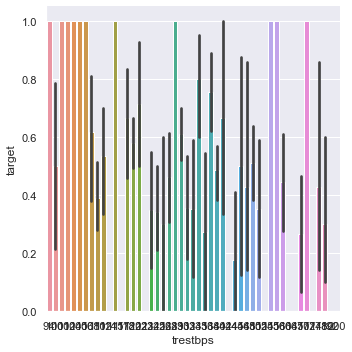

In [14]:
sns.catplot(x='trestbps',y='target',data=heart,kind='bar')

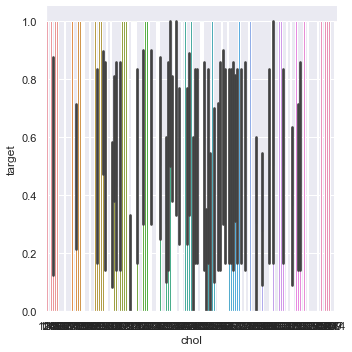

In [15]:
sns.catplot(x='chol',y='target',data=heart,kind='bar')

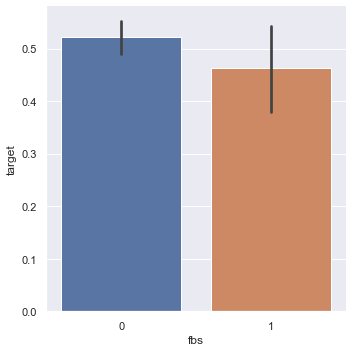

In [16]:
sns.catplot(x='fbs',y='target',data=heart,kind='bar')

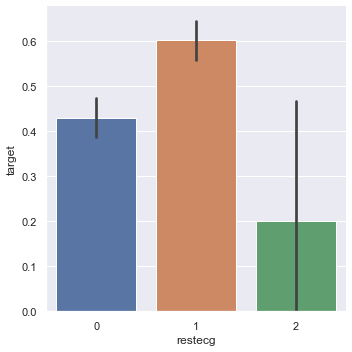

In [17]:
sns.catplot(x='restecg',y='target',data=heart,kind='bar')

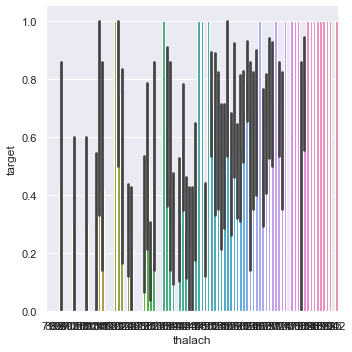

In [18]:
sns.catplot(x='thalach',y='target',data=heart,kind='bar')

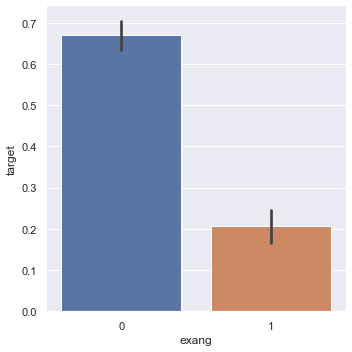

In [19]:
sns.catplot(x='exang',y='target',data=heart,kind='bar')

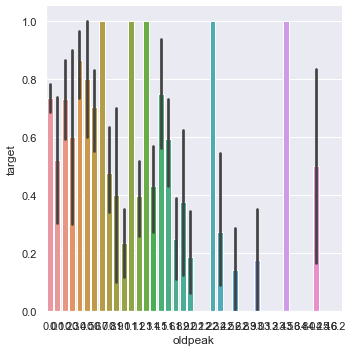

In [20]:
sns.catplot(x='oldpeak',y='target',data=heart,kind='bar')

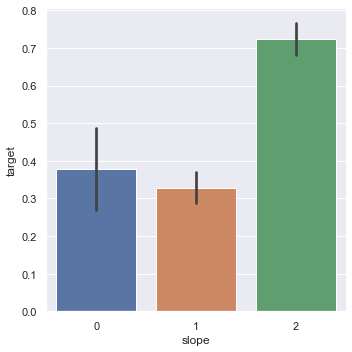

In [21]:
sns.catplot(x='slope',y='target',data=heart,kind='bar')

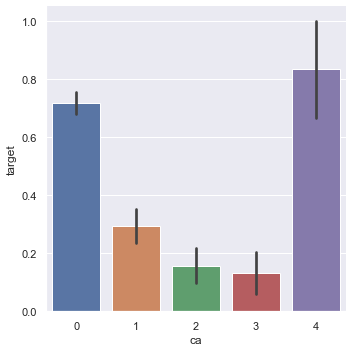

In [22]:
sns.catplot(x='ca',y='target',data=heart,kind='bar')

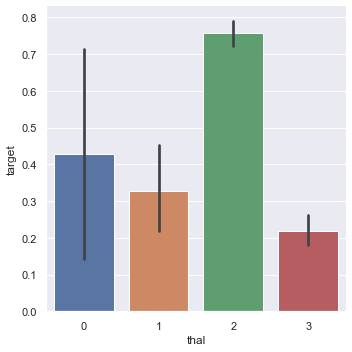

In [23]:
sns.catplot(x='thal',y='target',data=heart,kind='bar')

<b>CORRELATION ANALYSIS : FINDING STRONGLY COUPLED ATTRIBUTES

In [24]:
corr=heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


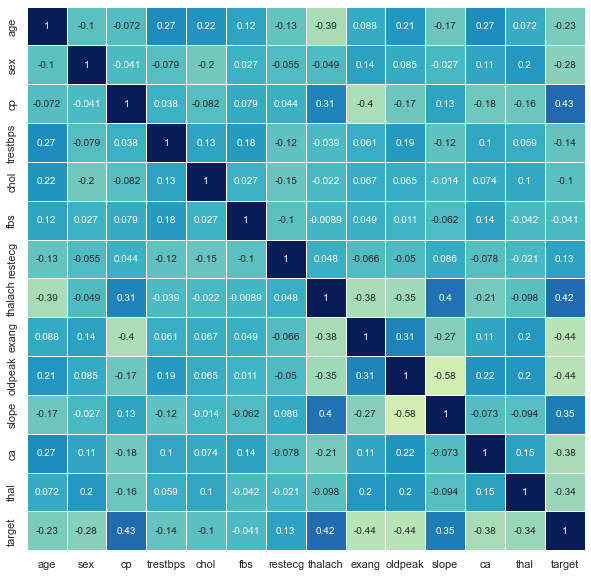

In [25]:
# Plotting heatmap of correlation of attributes
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu");
plt.show()

In [26]:
# Assumption : If correlation is >0.7 or <-0.7, two attributes are strongly coupled
corr[corr>0.7]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [27]:
corr[corr<-0.7]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>CONCLUSION: This correlational analysis will not have an effect on feature selection beacuse there are NO strongly correlated features in the dataset. We have considered that 2 features will be considered strongly correlated if the correlation between them is > |0.7|. However, we can see that there are no features present in the dataset which have a correlation greater than |0.7|. Therefore, we will not drop any column.

<h3>3. Data Pre-processing and cleaning

<b>Do the appropriate pre-processing of the data like identifying NULL or Missing Values
if any, handling of outliers if present in the dataset, skewed data etc. Mention the preprocessing steps performed in the markdown cell with justification.


<b>1. Identifying Null/Missing values

In [28]:
# Checking for null values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
# Replacing NaN values with median
heart = heart.replace('?', np.nan)
heart = heart.apply(lambda x: x.fillna(x.median()),axis=0)

In [30]:
# Verifying that no NaN values are there in dataset
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<b>Handling of outliers

Based on the boxplots in the EDA, we can see that the outliers are present in the following features : tresrbps, chol, fbs, oldpeak, ca, thal, thalach. There we remove them below

In [31]:
#Remving outliers based on the box plots in Exploratory data analysis

heart = heart[(heart['trestbps'] <= 170) & (heart['trestbps'] >= 50)]
heart = heart[(heart['chol'] <= 380) & (heart['chol'] >= 0)]
heart = heart[(heart['fbs'] <= 0.8) & (heart['fbs'] >= 0)]
heart = heart[(heart['oldpeak'] <= 5) & (heart['oldpeak'] >= 0)]
heart = heart[(heart['ca'] <= 2.5) & (heart['ca'] >= 0)]
heart = heart[(heart['thal'] <= 3) & (heart['thal'] >= 1)]
heart = heart[(heart['thalach'] <= 300) & (heart['thalach'] >= 80)]

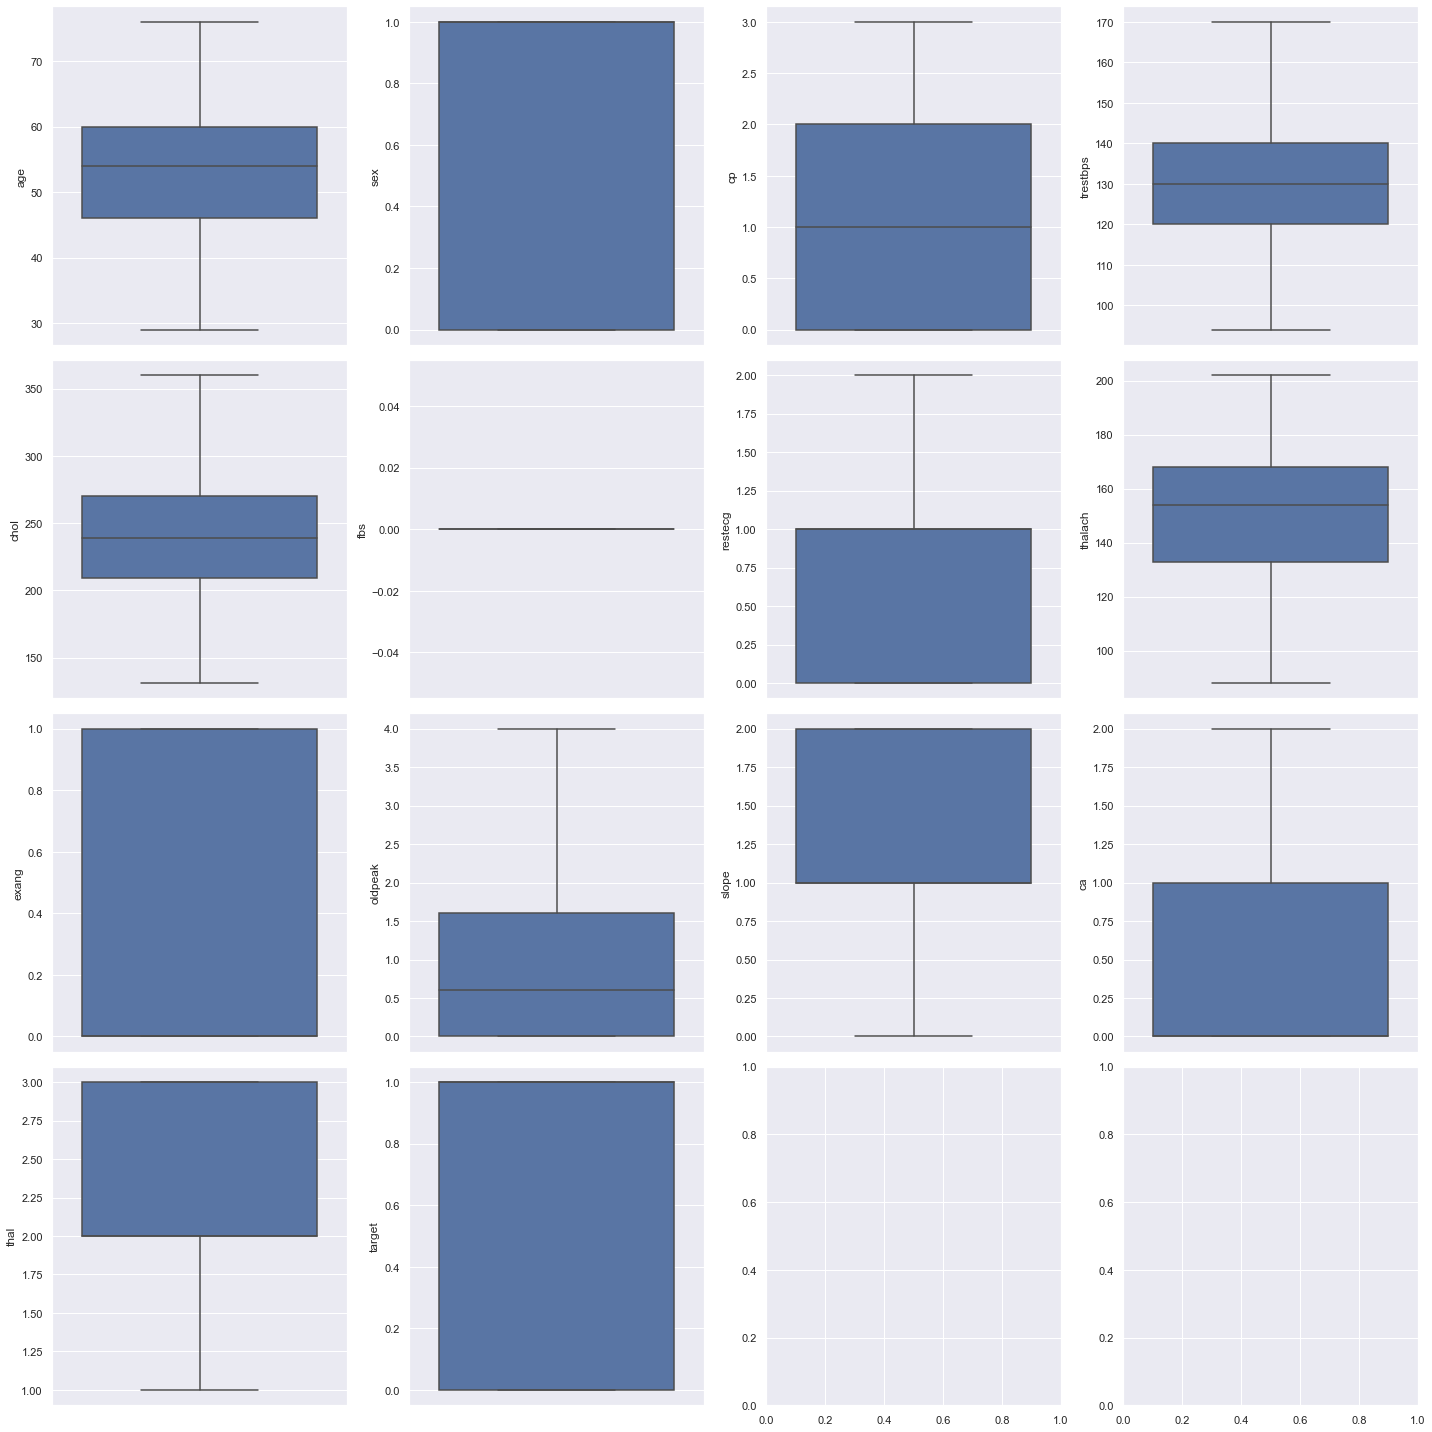

In [32]:
#Check if all the outliers have been remved successfully

names = heart.columns
fig,axes = plt.subplots(4,4, figsize=(20,20))
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=heart, ax=ax)
plt.tight_layout()

In [33]:
heart.skew()

age        -0.177371
sex        -0.832416
cp          0.580705
trestbps    0.276280
chol        0.266805
fbs         0.000000
restecg    -0.006654
thalach    -0.482755
exang       0.754599
oldpeak     0.944266
slope      -0.503237
ca          1.075802
thal       -0.143249
target     -0.196376
dtype: float64

<b>- Pre-Processing:<br>
<b>- For data pre-processing, the null values have been identified and replaced.<br>
<b>- Outliers have been identified and removed using the box plot method.

<b>- Feature Scaling:<br>
<b>- Since the columns are not scaled, to bring all the columns on the same scale, normalization has been done. But it has been done after the test train split, to prevent data leakage.<br>
<b>- Standard sclaer has been appliedon the training dataset.

# TRAINING TEST DATA SPLIT

In [34]:
y= heart[['target']]
x= heart.drop('target',axis=1)

In [35]:
y.head(10)

,target
0,0
2,0
3,0
5,1
7,0
8,0
9,0
10,1
12,1
15,1


In [36]:
x.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3


<b> Standard scaler to remove the mean and scale each feature/variable to unit variance.

In [77]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()   
x1=st_x.fit_transform(x)

<b>Since the size of the dataset comparatively small, we decided to follow the Pareto principle and go with a 80:20 train test split. 

In [79]:
x_train, x_test, y_train, y_test= train_test_split(x1, y, test_size= 0.2, random_state=0)

<b>Used MinMax scaler to prevent bias because of variables that are measured at different scales. These varibales do not contribute equally to the model fitting & model learned function and therefore might end up creating a bias. To deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [80]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)
y_train = min_max_scaler.fit_transform(y_train)
y_test = min_max_scaler.fit_transform(y_test)

IMPLEMENTING KNN

In [81]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
knn_classifier.fit(x_train, y_train) 

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [82]:
#Predicting the test set result  
y_pred= knn_classifier.predict(x_test)  

<b> Selection of evaluation metrices:
 For our dataset, the confusoin matrix, accuracy is choosed for evaluation. This is because out dataset does not contain a class imbalance, therefore, the chances of the accuracy mertics being deceptive here are very less. And since in our case all the classes are of equal importance, we decided to go ith accuracy.It is calculated as the ratio between the number of correct predictions to the total number of predictions.

In [83]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[55,  9],
       [18, 72]], dtype=int64)

In [84]:
accuracy_score(y_test,y_pred)

0.8246753246753247

ACCURACY OF THE MODEL IS PRETTY GOOD WITH 31 TYPE1 ERRORS AND 48 TYPE2 ERRORS

IMPLEMENTING RANDOM FOREST

In [85]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
rf_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_classifier.fit(x_train, y_train)  

C:\Users\aditi\AppData\Local\Temp\ipykernel_13896\3235615233.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [86]:
y_pred= rf_classifier.predict(x_test)  

In [87]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[62,  2],
       [ 0, 90]], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred)

0.987012987012987

ACCURACY OF THE MODEL IS VERY HIGH.

# APPLYING PCA

In [89]:
covmat=np.cov(x1,rowvar=False)
print(covmat)

[[ 1.00130208 -0.08982997 -0.07626844  0.26390023  0.17650805  0.
  -0.10361349 -0.39916843  0.11484954  0.21955239 -0.16157658  0.39074844
   0.13117768]
 [-0.08982997  1.00130208 -0.11317703 -0.01005729 -0.09171859  0.
  -0.11669857 -0.09255995  0.20935771  0.17105335 -0.01023117  0.10567888
   0.27082667]
 [-0.07626844 -0.11317703  1.00130208  0.08660991 -0.04148329  0.
   0.07437642  0.28847814 -0.35853098 -0.13179904  0.10499167 -0.20539635
  -0.1524308 ]
 [ 0.26390023 -0.01005729  0.08660991  1.00130208  0.1232342   0.
  -0.12523887 -0.01410112 -0.03793636  0.11547518 -0.02033951  0.02400275
   0.05122962]
 [ 0.17650805 -0.09171859 -0.04148329  0.1232342   1.00130208  0.
  -0.09710884 -0.02067472  0.02252929 -0.02895389  0.05596984  0.11100889
   0.0820598 ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.10361349 -0.11669857  0.07437642 -0.12523887 -0.09710884  0.
   1.0013020

In [90]:
pca=PCA(n_components=13)
pca.fit(x1)

PCA(n_components=13)

In [91]:
#EIGEN VALUES
print(pca.explained_variance_)

[2.92895221e+00 1.47828674e+00 1.21934940e+00 1.10598594e+00
 9.94304926e-01 8.79150733e-01 7.94667415e-01 6.76685295e-01
 6.28871460e-01 5.48624130e-01 3.93190253e-01 3.67556497e-01
 1.56462997e-35]


In [92]:
# EIGEN VECTORS
print(pca.components_)

[[ 2.95881066e-01  1.61418975e-01 -2.62627181e-01  7.36095968e-02
   5.85678327e-02 -1.08420217e-19 -1.12372324e-01 -4.32727420e-01
   3.90708566e-01  4.12066685e-01 -3.35020593e-01  3.24637935e-01
   2.61945465e-01]
 [ 5.04085239e-01 -3.46410725e-01  2.11971919e-01  4.88575490e-01
   4.23920491e-01 -6.93889390e-18 -1.90911178e-01  1.65412715e-02
  -2.61244456e-01 -4.27561301e-02  7.76342821e-02  1.92552507e-01
  -1.12472221e-01]
 [ 5.40843059e-02 -4.73125452e-01  2.25654243e-01 -5.96772096e-02
  -3.27842839e-01  2.77555756e-16  2.17566877e-01 -2.01553913e-01
  -4.65459530e-02  2.31198344e-01 -5.11812137e-01 -1.82865428e-01
  -4.15084457e-01]
 [-1.44592880e-01  4.24039953e-01  4.05902864e-01  4.40028482e-01
  -2.72307277e-01  0.00000000e+00 -4.07124504e-01  1.71257695e-01
  -1.08392340e-01  2.66260021e-01 -2.07883303e-01 -1.99202416e-01
   7.82919933e-02]
 [ 1.45994348e-01  9.41574767e-02  3.61595312e-01  1.59831964e-01
  -1.36365575e-01  3.46944695e-17  7.37960953e-01  5.48514775e-03


CALCULATING PERCENTAGE VARIANCE

In [93]:
print(pca.explained_variance_ratio_)

[2.43761952e-01 1.23030366e-01 1.01480314e-01 9.20456442e-02
 8.27509951e-02 7.31672912e-02 6.61361698e-02 5.63171116e-02
 5.23378068e-02 4.56592254e-02 3.27232460e-02 3.05898775e-02
 1.30216278e-36]


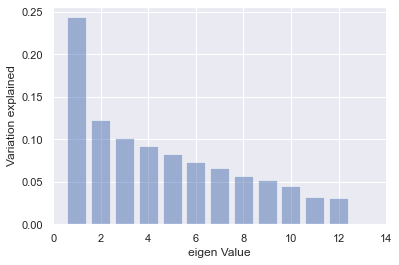

In [94]:
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

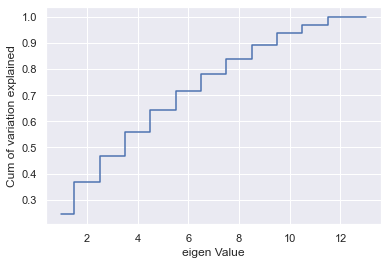

In [95]:
plt.step(list(range(1,14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

FROM THE PLOT, TEN DIMENSIONS(TEN NEW INDEPENDENT VARIABLES) SEEMS REASONABLE AS THY DESCRIBES ALMOST 90% OF THE VARIATION IN THE ORIGINAL DATA

In [96]:
pca=PCA(n_components=10)
pca.fit(x1)
xpca=pca.transform(x1)
xpca

array([[ 0.23462558, -0.52735074, -1.58627173, ...,  0.78058564,
         1.122693  , -0.46259125],
       [ 3.36220867, -0.73131887,  1.61351561, ..., -0.45186271,
         0.29725284, -0.57583685],
       [-0.09650826,  0.37575192, -1.4551869 , ..., -0.043225  ,
         0.69959574, -0.67641716],
       ...,
       [ 1.74423598, -1.1107764 , -0.23841699, ..., -0.0328775 ,
        -0.97267008,  0.18915399],
       [-1.57965358,  0.09106161, -0.1373556 , ..., -0.62504333,
         0.84748859,  0.09302643],
       [ 1.56325737, -1.26771283,  0.32889887, ..., -0.76370594,
         0.48608408, -1.33620456]])

In [100]:
xpca_train,xpca_test=train_test_split(xpca,test_size=0.20,random_state=1)

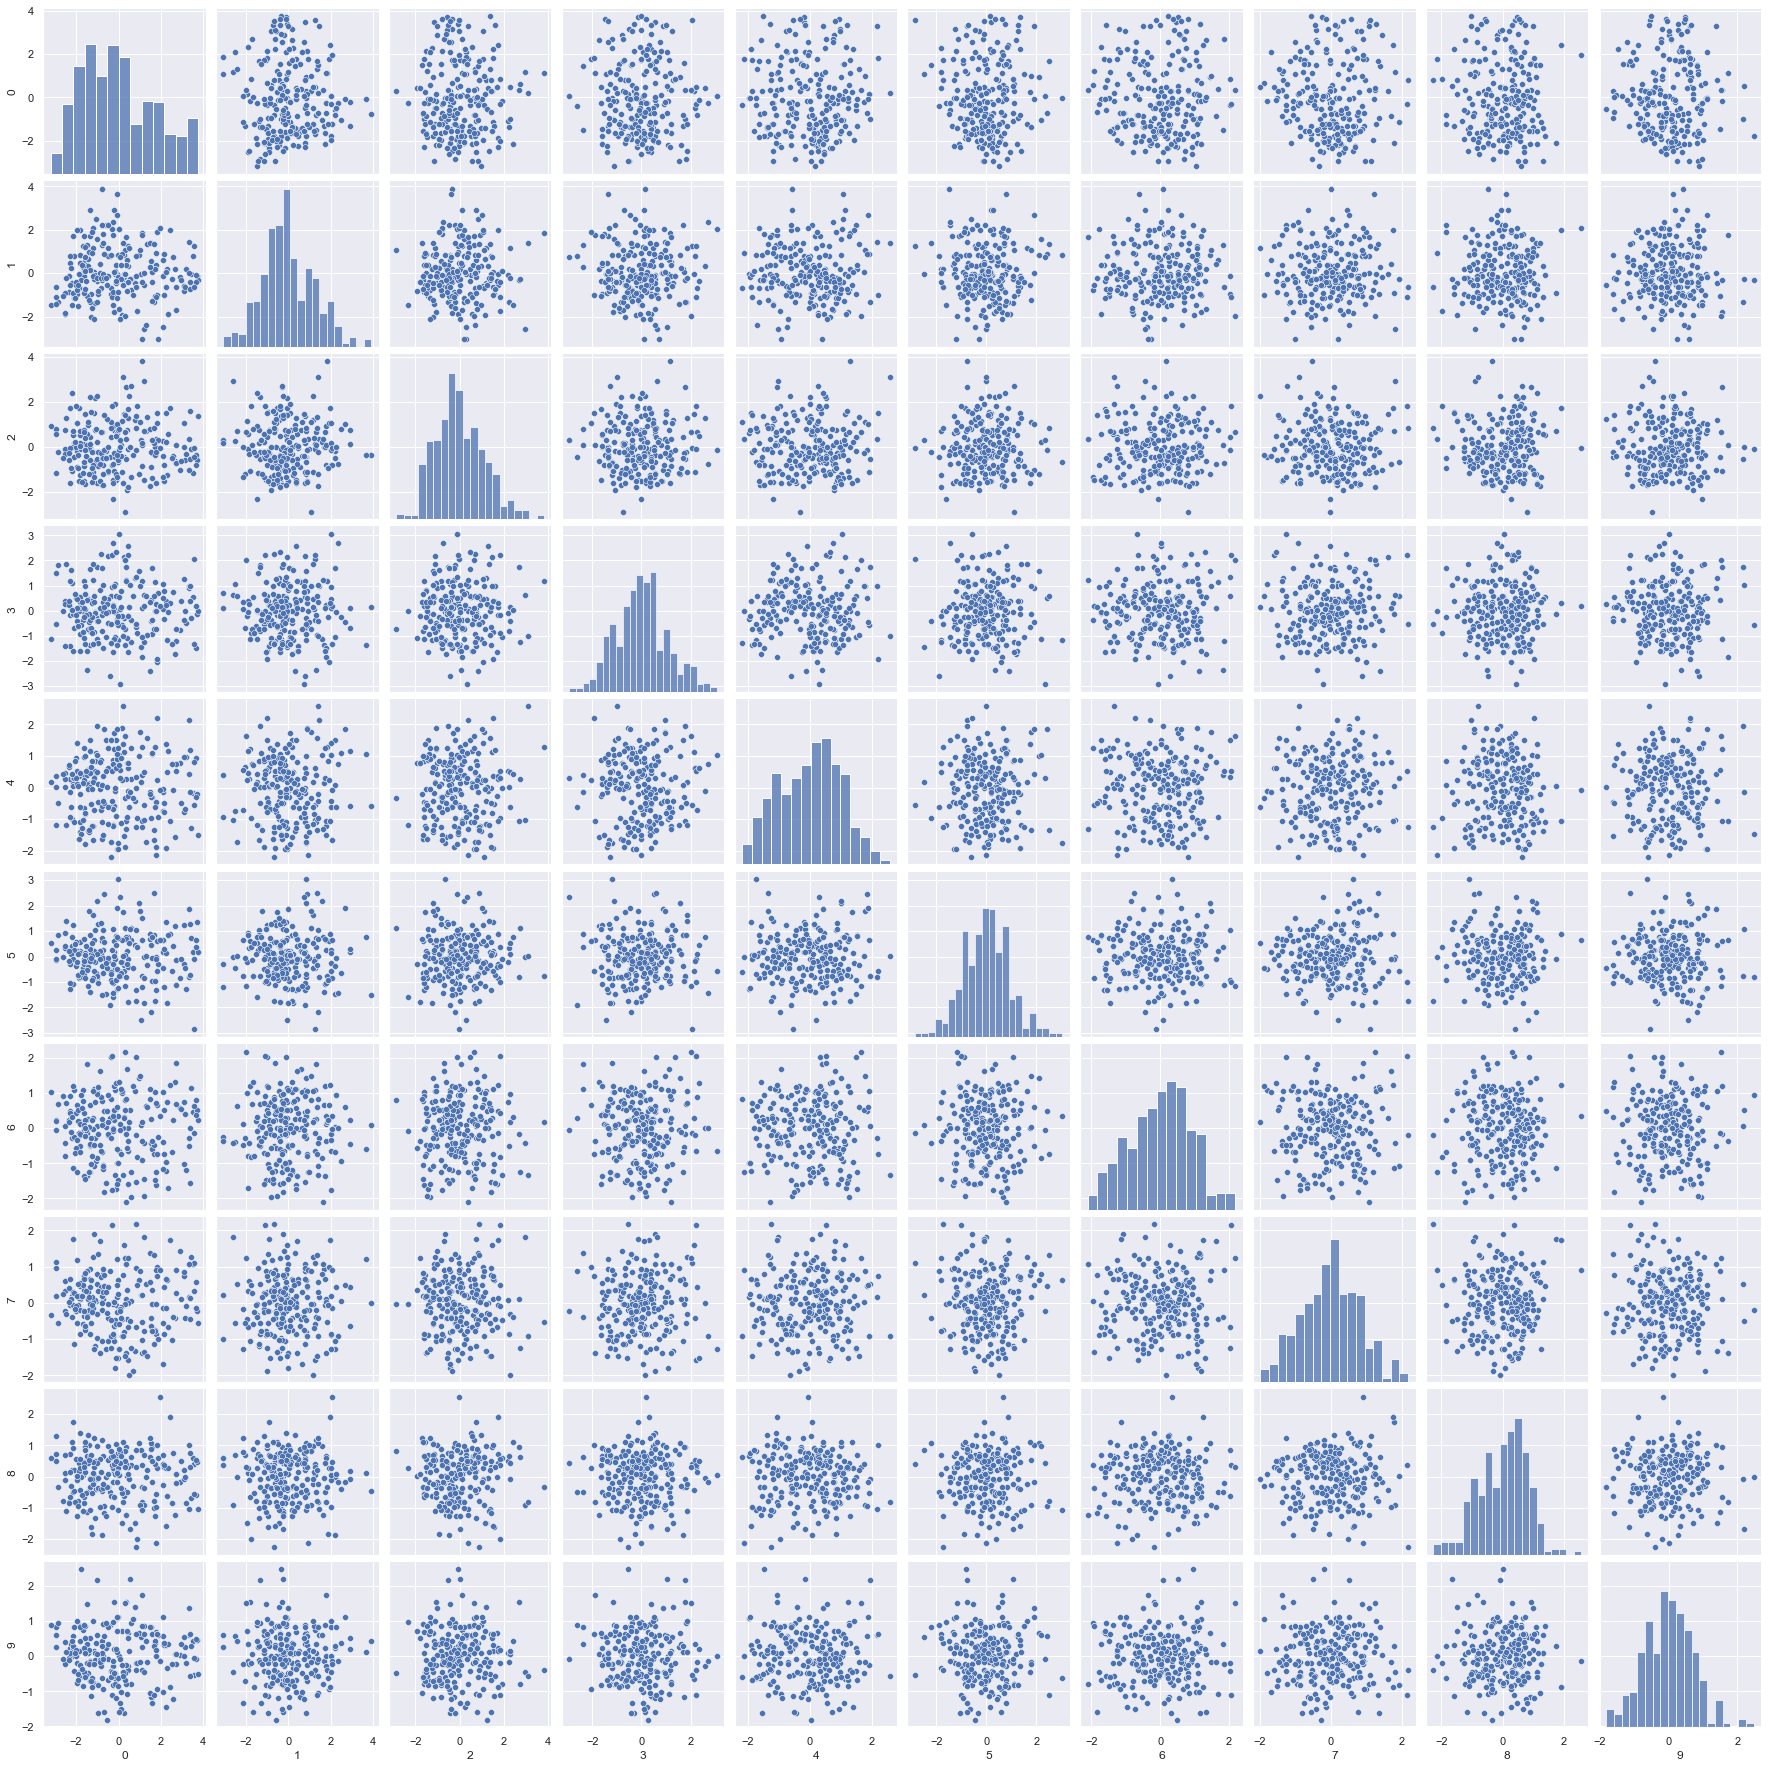

In [101]:
sns.pairplot(pd.DataFrame(xpca))

It is evident from the plot that the new 10 variables are independent of each other.

IMPLEMENTING KNN AFTER PCA

In [102]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
knn_classifier.fit(xpca_train, y_train) 

C:\Users\aditi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [103]:
y_pred= knn_classifier.predict(xpca_test)  

In [104]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[29, 35],
       [38, 52]], dtype=int64)

In [105]:
accuracy_score(y_test,y_pred)

0.525974025974026

Type 1 errors =77, Type 2 errors=76. Accuracy of the model drastically reduced after PCA. Hence it is not a good model.

IMPLEMENTING RANDOM FOREST AFTER PCA

In [106]:
from sklearn.ensemble import RandomForestClassifier  
rf_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rf_classifier.fit(xpca_train, y_train)  

C:\Users\aditi\AppData\Local\Temp\ipykernel_13896\48575822.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(xpca_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [110]:
y_pred= rf_classifier.predict(xpca_test)  

In [111]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[36, 28],
       [41, 49]], dtype=int64)

In [113]:
accuracy_score(y_test,y_pred)

0.551948051948052

Type 1 errors =72, Type 2 errors=80. Accuracy of the model drastically reduced after PCA. Hence it is not a good model.

<b>We can see from the above results of accuracy, that the Random forest model without PCA has given the best results with 98.7 accuracy. As compared to the KNN, 82.4 
The models when appied with the PCA gave approximately 50% accuracy, which is bad. Therefore, RANDOM FOREST MODEL WITHOUT PCA will be the best choice for prediction.